**Multi-class Immage Classification**

+ Become one with data
+ Preprocess the data (get it ready for a mobile)
+ Create a model (start with a baseline)
+ Fit the model (overfit it to make sure it works)
+ Evaluate the model
+ Addjust different hyperparameters and  improve the model
+ Repeat untill  a satisfactory accuracy is achieved

In [3]:
import zipfile

In [5]:
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


Saved under 10_food_classes_all_data.zip


In [6]:
# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

# Walk through  classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")
    

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 10 directorie

In [4]:
# Setup train and test directory

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Setup train and test directory

train_dir = "data/10_food_classes_all_data/train/"
test_dir = "data/10_food_classes_all_data/test/"

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import random


def view_random_image(target_dir:str, target_class:str):
    # Setup the target directory
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    
    # Read into image and plot it using matplotlib
    img = mpig.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img

In [6]:
# Lets class anmes
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


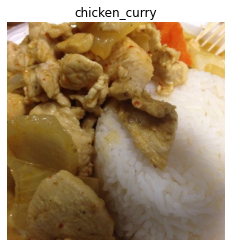

In [7]:
# Visualize (data exploration)
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


**Preprocessing**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


**Create a model**

With a baseline, create a model and try to beat that in furthur steps.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Replicating a model which is at CNN explainer website
model_1 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

2023-01-15 18:36:28.762039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 18:36:28.846646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 18:36:28.847491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 18:36:28.852201: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

2023-01-15 18:36:32.011903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-01-15 18:36:33.407408: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


235/235 [==============================] - 52s 192ms/step - loss: 2.1395 - accuracy: 0.2148 - val_loss: 2.1236 - val_accuracy: 0.2464
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 1.9368 - accuracy: 0.3199 - val_loss: 1.9444 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.7069 - accuracy: 0.4199 - val_loss: 1.8905 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.1970 - accuracy: 0.6041 - val_loss: 2.2034 - val_accuracy: 0.2956
Epoch 5/5
235/235 [==============================] - 48s 203ms/step - loss: 0.5424 - accuracy: 0.8276 - val_loss: 3.1214 - val_accuracy: 0.2908


In [11]:
# Evaluate the model
model_1.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 3.1214 - accuracy: 0.2908


[3.121372938156128, 0.290800005197525]

In [12]:
# Check out model loss curves
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training 
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # Loss
    plt.plot(epochs, loss, label="Train Loss")
    plt.plot(epochs, val_loss, label="Validity Loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Train accuracy")
    plt.plot(epochs, val_accuracy, label="Validity accuracy")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

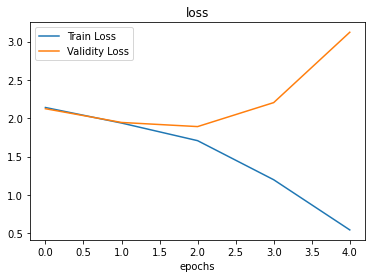

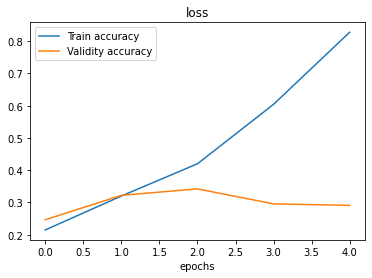

In [13]:
plot_loss_curves(history_1)

**Model is overfitting on training data**

Better result on training data, but not able to generalise on test data or unseen data.

**Hyperparameter tuning to beat the baseline**

Model is not able to generalise on unseen data. This overfitting can be solved by few steps

+ More data
+ Simplify the model (model may be too complicated to learn.
    + More Data.
    + Data augmentation - Data augmentation model add diversity to the training.
    + Use transfer learning - leverages the patterns another model  has already learned.

In [14]:
# Try simplifying the moldel
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

**Try smacking 2 Conv2D layer from model 1**

In [15]:
model_2 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.0590 - accuracy: 0.2628 - val_loss: 1.8826 - val_accuracy: 0.3640
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.6683 - accuracy: 0.4404 - val_loss: 1.8737 - val_accuracy: 0.3564
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.2353 - accuracy: 0.6088 - val_loss: 2.0248 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 44s 185ms/step - loss: 0.7026 - accuracy: 0.7969 - val_loss: 2.3563 - val_accuracy: 0.3260
Epoch 5/5
235/235 [==============================] - 43s 185ms/step - loss: 0.3364 - accuracy: 0.9151 - val_loss: 2.8878 - val_accuracy: 0.3024


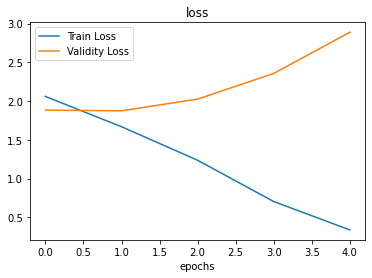

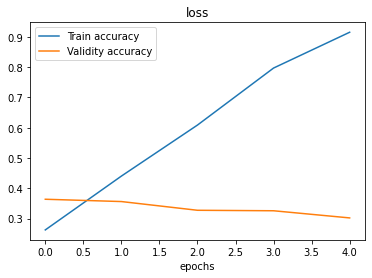

In [16]:
# Loss curves of model
plot_loss_curves(history_2)

As **simplifying the model** didn't work too well, and the overfitting continued. Now we should  try **data augmentation**. 

In [17]:
# Create an augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                               target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [18]:
# Let's create a model for augmented training data

model_3 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_3 = model_3.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 477ms/step - loss: 2.3116 - accuracy: 0.1841 - val_loss: 2.0859 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 113s 481ms/step - loss: 2.0744 - accuracy: 0.2619 - val_loss: 1.9718 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 113s 479ms/step - loss: 2.0156 - accuracy: 0.2900 - val_loss: 1.9046 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 113s 483ms/step - loss: 1.9718 - accuracy: 0.3125 - val_loss: 1.9108 - val_accuracy: 0.3452
Epoch 5/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9463 - accuracy: 0.3307 - val_loss: 1.8490 - val_accuracy: 0.3648


In [19]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.8490 - accuracy: 0.3648


[1.8489586114883423, 0.36480000615119934]

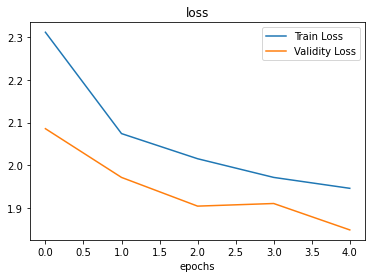

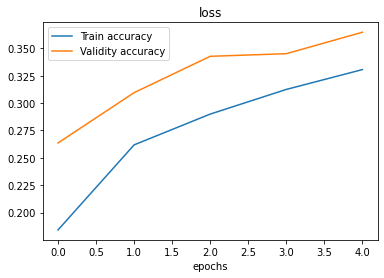

In [20]:
# Plot the curve for model 3
plot_loss_curves(history_3)

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

As there are not much improvement, we can make changes to our model, such as
+ Increasing layer and hidden units.
+ Adjust the learning rate.
+ try different method of Data Augmentation.
+ fit for longer.
+ Other model hyperparamater modification.
+ try **transfer learning**

For now we are making prediction on the trained model.

In [22]:
# Download some sample files
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-simple-convnet.png

--2023-01-15 18:56:19--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [  <=>               ] 138.76K   527KB/s    in 0.3s    

2023-01-15 18:56:20 (527 KB/s) - ‘03-hamburger.jpeg’ saved [142086]

--2023-01-15 18:56:21--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [  <=>               ] 143.45K   547KB/s    in 0.3s    

2023-01-15 18:56:22 (547 KB/s) - ‘03-pizza-dad.jpeg’ saved [146892]

--2023-01-

In [23]:
# Make a prediction on `model_3`
import tensorflow as tf
def load_and_prep_image(filename, img_shape=224):
    '''
    Read an image from the filename and turn it into (img_shape, img_shape, colour_channel) tensor
    '''
    # Read in the image
    img= tf.io.read_file(filename)

    
#     # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    
    # Rescale the image and get all values between 0 and 1
    img= img/255. 
    return img


load_and_prep_image("/kaggle/input/test-images/03-pizza-dad.jpeg")


InvalidArgumentError: Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [ ]:
pred_and_plot(model=model_3,
              filename="/kaggle/working/03-simple-convnet.png",
             class_names=list(class_names))